# Hypothesis testing

Table of contents
- [independent sample t-test](#samplet)
- [one sample t-test](#onesample)
- [Chi-Square](#chisquare)

In [18]:
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set()

<a id="samplet"></a>
## independent sample t-test  
Comparison of the mean of two samples.  
  
Calculation of the t-statistics with $2(N-1)$ degrees of freedom:
$$
t = \frac{M_x - M_y}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}}
$$
with
$$
S^2=\frac{\sum (x - \mu)}{n-1}
$$


In [2]:
#create normally distributed data with same standard deviation
N = 100
mu_a = 3
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=100)
#create data b 
mu_b = 5
sigma_b = 4
data_b = np.random.normal(loc=mu_b, scale=sigma_b, size=100)

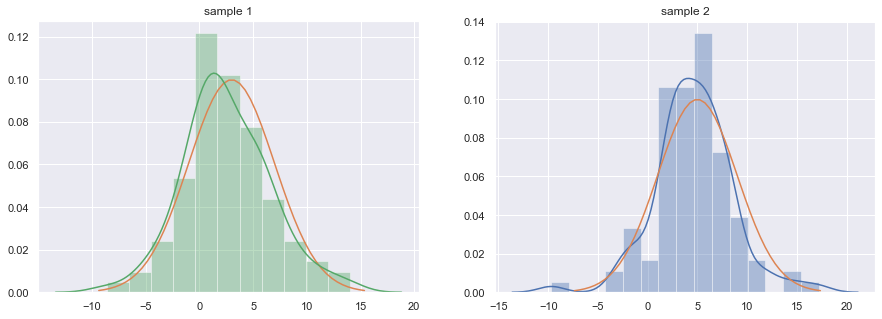

In [3]:
#Visualization
fig, ax = plt.subplots(1, 2, figsize=[15,5])
sns.distplot(data_b, ax=ax[1])
range_a = np.linspace(stats.norm.ppf(0.001, mu_a, sigma_a), stats.norm.ppf(0.999, mu_a, sigma_a))
range_b = np.linspace(stats.norm.ppf(0.001, mu_b, sigma_b), stats.norm.ppf(0.999, mu_b, sigma_b))
ax[1].plot(range_b, stats.norm.pdf(range_b, loc=mu_b, scale=sigma_b))
ax[0].plot(range_a, stats.norm.pdf(range_a, loc=mu_a, scale=sigma_a), color='C1')
ax[0].set_title("sample 1")
ax[1].set_title("sample 2")
sns.distplot(data_a, ax=ax[0], color='C2' )

In [4]:
#calculate t-statistics

#from scratch
var1 = np.var(data_a, ddof=1)
var2 = np.var(data_b, ddof=1)
mean1 = np.mean(data_a)
mean2 = np.mean(data_b)
t = (mean1 - mean2)/(np.sqrt(var1/N + var2/N))
pval =stats.t.cdf(t, df=2*N-2) * 2
print("t: {}, pvalue: {}".format(t, pval))

t: -3.7863969131446638, pvalue: 0.00020259998339248079


In [5]:
#calculate with scipy stats
stats.ttest_ind(data_a,data_b)

Ttest_indResult(statistic=-3.7863969131446638, pvalue=0.00020259998339248079)

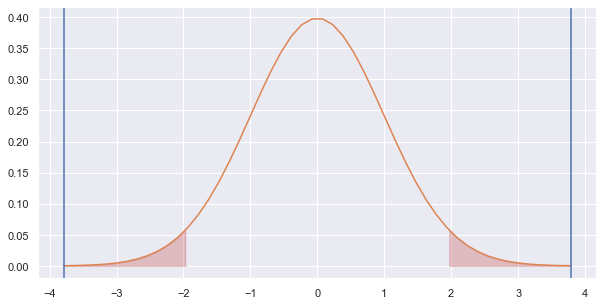

In [6]:
#Visualization
fig, ax = plt.subplots(1, 1, figsize=[10,5])

range_a = np.linspace(stats.t.ppf(0.0001, df=2*(N-1)), stats.t.ppf(0.9999, df=2*(N-1)))

ax.plot(range_a, stats.t.pdf(range_a, df=2*(N-1)), color='C1')
ax.axvline(t)
ax.axvline(-t)
range_fill_l = np.linspace(stats.t.ppf(0.0001, df=2*(N-1)), stats.t.ppf(0.025, df=2*(N-1)))
range_fill_r = np.linspace(stats.t.ppf(0.975, df=2*(N-1)), stats.t.ppf(0.9999, df=2*(N-1)))
ax.fill_between(range_fill_l,stats.t.pdf(range_fill_l, df=2*(N-1)),color='r', alpha=0.3)
ax.fill_between(range_fill_r,stats.t.pdf(range_fill_r, df=2*(N-1)),color='r', alpha=0.3)

<a id="onesample"></a>
## One sample t-test
Comparison of mean of one sample to a known value. (population mean with null hypothesis)  
Calculation of t-statistics:
$$
t = \frac{x-\mu}{\frac{S}{\sqrt{n}}}
$$


In [7]:
#create normally distributed data with same standard deviation
N = 100
mu_a = 3
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=100)

#define known value
mu = 3.2

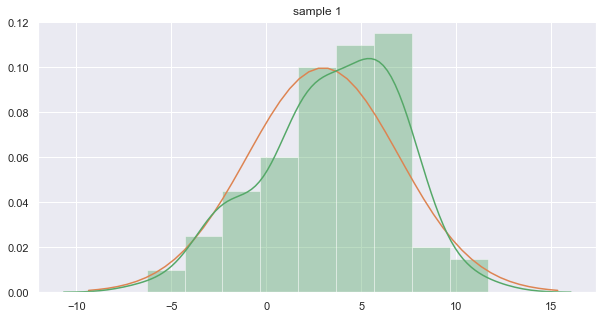

In [8]:
#Visualization
fig, ax = plt.subplots(1, 1, figsize=[10,5])

range_a = np.linspace(stats.norm.ppf(0.001, mu_a, sigma_a), stats.norm.ppf(0.999, mu_a, sigma_a))

ax.plot(range_a, stats.norm.pdf(range_a, loc=mu_a, scale=sigma_a), color='C1')
ax.set_title("sample 1")

sns.distplot(data_a, ax=ax, color='C2' )

In [9]:
#calculate t-statistics from scratch
t = (np.mean(data_a) - mu)/(np.sqrt(np.var(data_a,ddof=1)/N)) 
pvalue = stats.t.cdf(t, df=(N-1))*2
print("t: {}, pvalue: {}".format(t, pvalue))

t: 0.7743647197424448, pvalue: 1.5594394239402942


In [10]:
#calculate with scipy stats
stats.ttest_1samp(data_a,popmean=mu)

Ttest_1sampResult(statistic=0.7743647197424448, pvalue=0.44056057605970567)

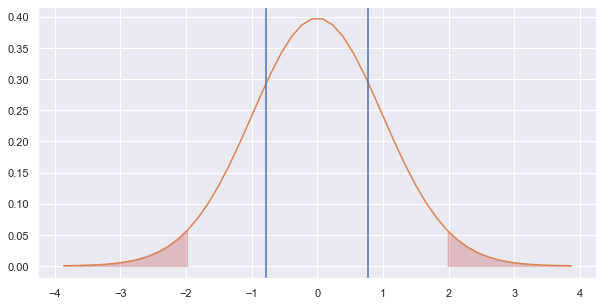

In [11]:
#Visualization
fig, ax = plt.subplots(1, 1, figsize=[10,5])

range_a = np.linspace(stats.t.ppf(0.0001, df=N-1), stats.t.ppf(0.9999, df=N-1))

ax.plot(range_a, stats.t.pdf(range_a, df=N-1), color='C1')
ax.axvline(t)
ax.axvline(-t)
range_fill_l = np.linspace(stats.t.ppf(0.0001, df=N-1), stats.t.ppf(0.025, df=N-1))
range_fill_r = np.linspace(stats.t.ppf(0.975, df=N-1), stats.t.ppf(0.9999, df=N-1))
ax.fill_between(range_fill_l,stats.t.pdf(range_fill_l, df=N-1),color='r', alpha=0.3)
ax.fill_between(range_fill_r,stats.t.pdf(range_fill_r, df=N-1),color='r', alpha=0.3)


<a id='chi-square'></a> $\chi^2$